In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import time

import warnings
warnings.filterwarnings('ignore')

# Assignment
In this assignment, we will work with the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which is another image dataset that comprised of 70000 greyscale 28x28 images. The dataset contains 10 classes as follows:

 - T-shirt/top
 - Trouser/pants
 - Pullover shirt
 - Dress
 - Coat
 - Sandal
 - Shirt
 - Sneaker
 - Bag
 - Ankle boot
 
__Select 10000 images randomly and work on this sample in the following exercises.__

## 1. Loading the Dataset and Pre-Processing

In [3]:
# Load the MNIST dataset
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

# Randomly select 10000 samples
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


## 2. Apply t-SNE to the data by setting `n_components=2`.

In [5]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the t-SNE components
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.003s...
[t-SNE] Computed neighbors for 10000 samples in 314.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.352462
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.598503
[t-SNE] KL divergence after 300 iterations: 2.602138
t-SNE done! Time elapse

## 3. Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [6]:
plt.figure(figsize=(10,5))
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"] #10 classes, 10 colors
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## 4. Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?

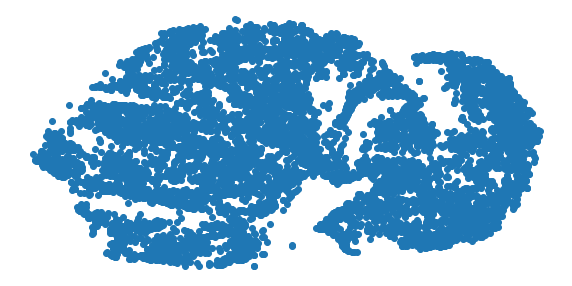

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The clustering of similarly colored points by t-SNE was far more effective than that done by PCA. Even though there is still some overlap between clusters, it is much easier to distinguish between classes using this t-SNE plot than the PCA plot. However, I don't think t-SNE does a good enough job, as there is still too much overlap between some colors. 

## 5. Now, play with the different `perplexity` values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.002s...
[t-SNE] Computed neighbors for 10000 samples in 267.842s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.287575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.584747
[t-SNE] KL divergence after 300 iterations: 3.554476


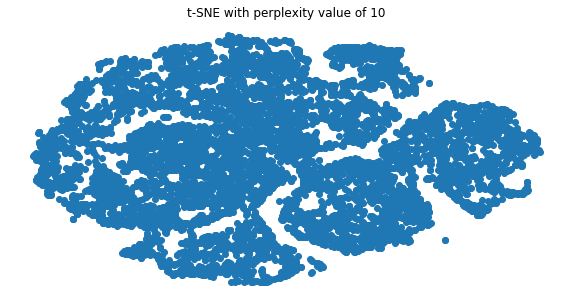

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.985s...
[t-SNE] Computed neighbors for 10000 samples in 303.808s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.836330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.750397
[t-SNE] KL divergence after 300 iterations: 3.072208


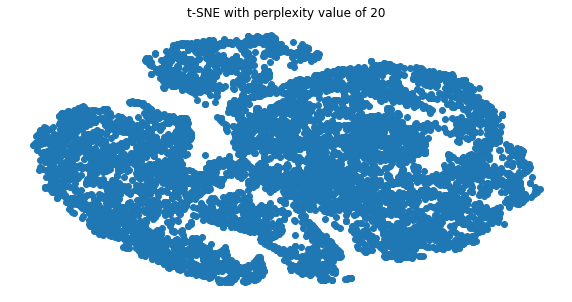

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.920s...
[t-SNE] Computed neighbors for 10000 samples in 334.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.146725
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.765518
[t-SNE] KL divergence after 300 iterations: 2.798073


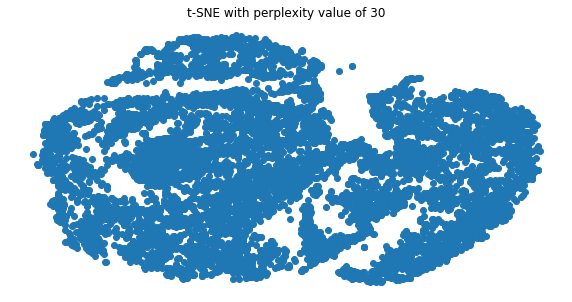

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.395s...
[t-SNE] Computed neighbors for 10000 samples in 329.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.516228
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.913216
[t-SNE] KL divergence after 300 iterations: 2.463651


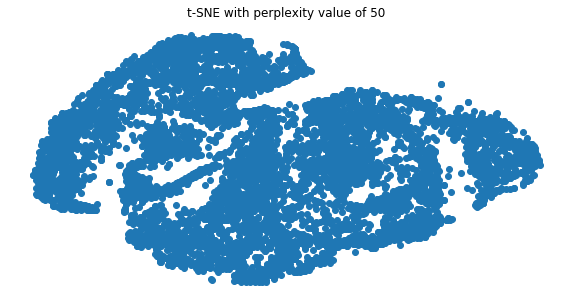

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.099s...
[t-SNE] Computed neighbors for 10000 samples in 314.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.650164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.370430
[t-SNE] KL divergence after 300 iterations: 2.330811


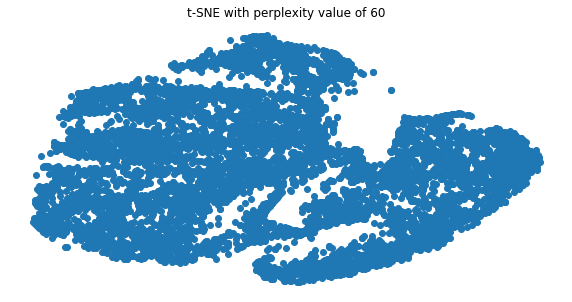

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.979s...
[t-SNE] Computed neighbors for 10000 samples in 312.613s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.767029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.046379
[t-SNE] KL divergence after 300 iterations: 2.214950


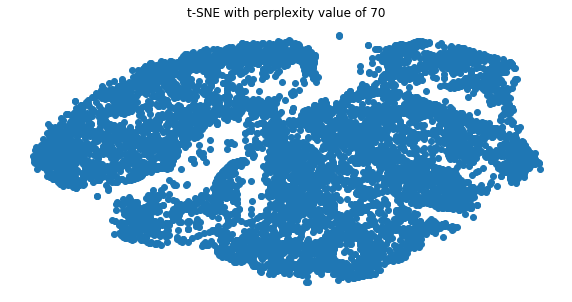

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.071s...
[t-SNE] Computed neighbors for 10000 samples in 319.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.872160
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.018539
[t-SNE] KL divergence after 300 iterations: 2.140877


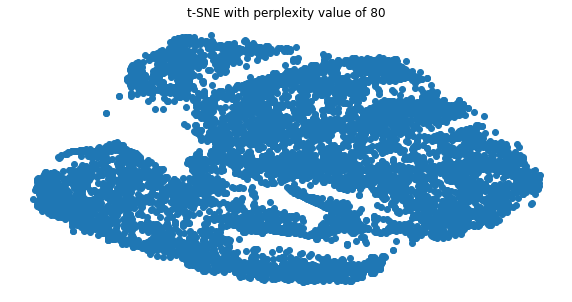

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.996s...
[t-SNE] Computed neighbors for 10000 samples in 312.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.964212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.045273
[t-SNE] KL divergence after 300 iterations: 2.063004


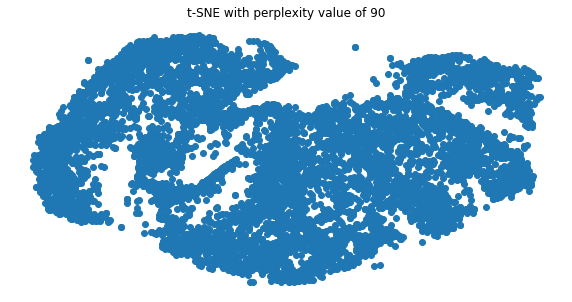

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.168s...
[t-SNE] Computed neighbors for 10000 samples in 307.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.043031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.181335
[t-SNE] KL divergence after 300 iterations: 1.983027


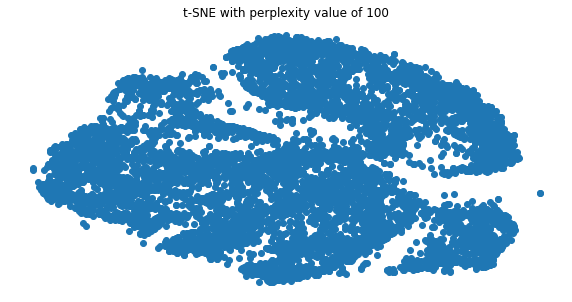

In [6]:
for perp in [10, 20, 30, 50, 60, 70, 80, 90, 100]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('t-SNE with perplexity value of ' + str(perp))
    plt.show()

Each unique perplexity value changes the clustering of points within the 2-D representation, but because it doesn't show colors or labels, there's no way of telling if the clusters are actually separating the dataset appropriately. Additionally, since the clusters are not separated very strongly in most cases, it is unlikely that these analyses will produce actionable insight.